In [16]:
from shapely.geometry import Point
import seaborn as sns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [24]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip = cases_by_zip.reset_index()
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(float)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Zip,Cases,ZIP
0,37013.0,13354,37013.0
18,37211.0,10233,37211.0
16,37209.0,5072,37209.0
14,37207.0,4729,37207.0
6,37115.0,4574,37115.0


In [18]:
top_5_z=cases_zip_ord.head(3)

In [19]:
case_count_dfff=case_count_df[case_count_df['Zip'].isin(top_5_z.ZIP)]
case_count_dfff

,Specimen Collection Date,Zip,Cases,date
2,3/11/2020,37013.0,1,2020-03-11
10,3/12/2020,37013.0,1,2020-03-12
12,3/12/2020,37211.0,1,2020-03-12
18,3/13/2020,37013.0,1,2020-03-13
24,3/13/2020,37211.0,1,2020-03-13
...,...,...,...,...
8806,3/26/2021,37209.0,3,2021-03-26
8808,3/26/2021,37211.0,13,2021-03-26
8819,3/27/2021,37013.0,1,2021-03-27
8826,3/27/2021,37209.0,2,2021-03-27


In [20]:
top_5_b=cases_zip_ord.tail(3)

In [22]:
case_count_bot=case_count_df[case_count_df['Zip'].isin(top_5_b.ZIP)]
case_count_bot

,Specimen Collection Date,Zip,Cases,date
332,3/31/2020,37213.0,1,2020-03-31
349,4/1/2020,37213.0,1,2020-04-01
452,4/8/2020,37213.0,1,2020-04-08
887,5/5/2020,37213.0,1,2020-05-05
960,5/10/2020,37238.0,1,2020-05-10
1253,5/28/2020,37213.0,1,2020-05-28
1325,6/1/2020,37213.0,1,2020-06-01
1369,6/3/2020,37213.0,1,2020-06-03
1547,6/12/2020,37213.0,1,2020-06-12
1566,6/13/2020,37213.0,1,2020-06-13


In [5]:
cases_zip_ord

,Cases,ZIP
Zip,,
37013.0,13354,37013.0
37211.0,10233,37211.0
37209.0,5072,37209.0
37207.0,4729,37207.0
37115.0,4574,37115.0
37076.0,4279,37076.0
37221.0,3910,37221.0
37217.0,3907,37217.0
37214.0,3508,37214.0


In [6]:
case_count_df.Zip.unique()

array([37217., 37214., 37013., 37204., 37205., 37210., 37212., 37215.,
          nan, 37211., 37220., 37138., 37203., 37206., 37219., 37221.,
       37027., 37208., 37115., 37209., 37216., 37076., 37207., 37072.,
       37189., 37218., 37201., 37228., 37080., 37213., 37238., 37069.])

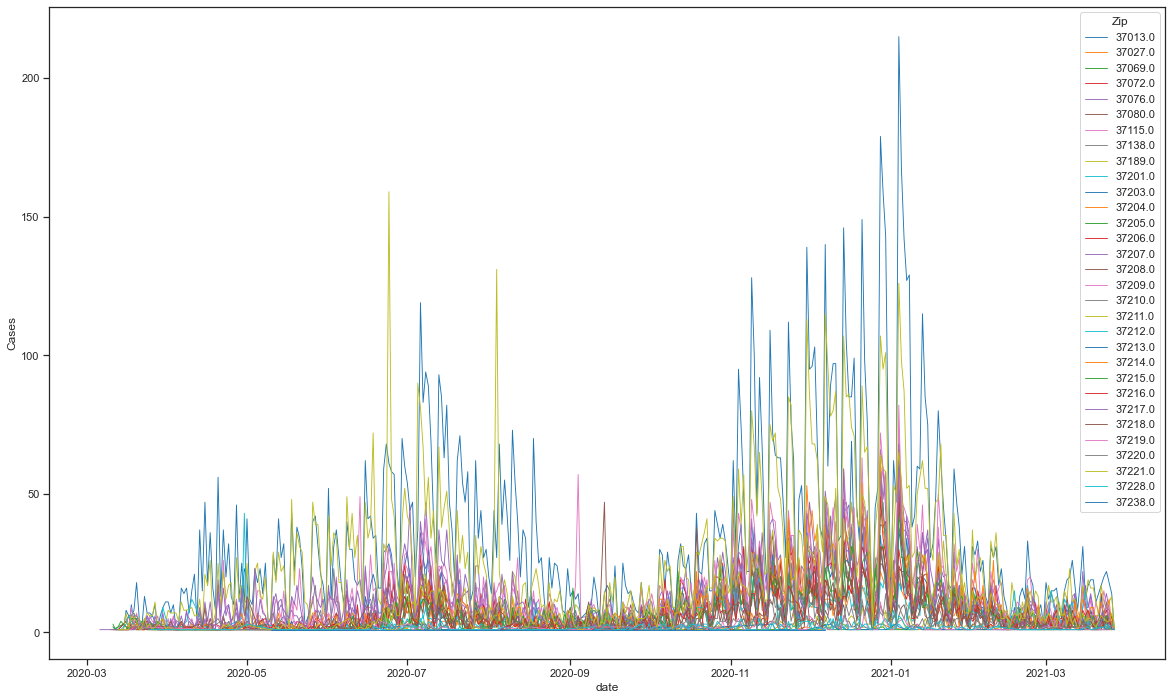

In [38]:
sns.set(style="ticks", rc={"lines.linewidth": 0.9})
sns.lineplot(data=case_count_df, x="date", y="Cases", hue='Zip', palette='tab10')
mpl.rcParams['figure.figsize'] = 20,12

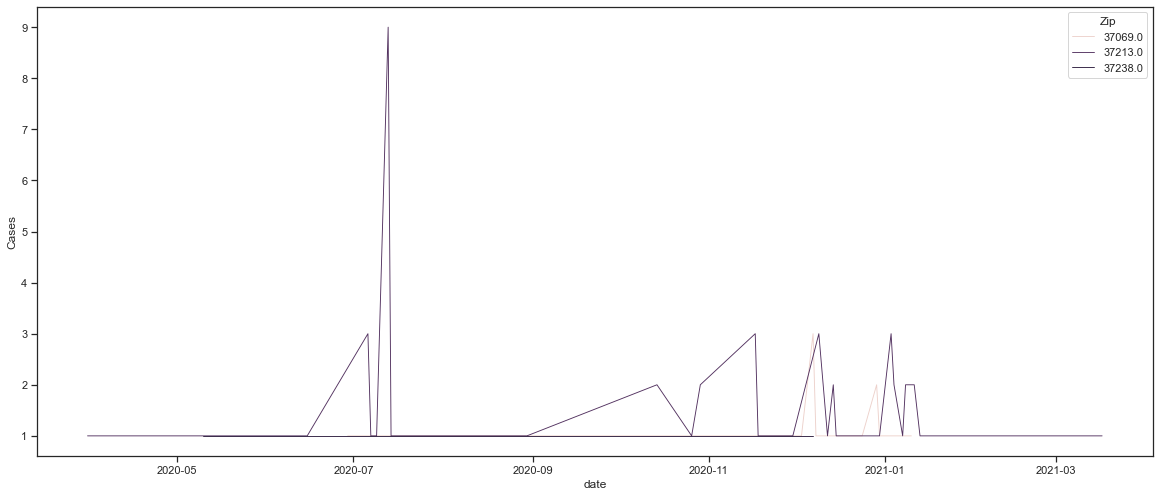

In [26]:
sns.set_palette("hls")
sns.set(style="ticks", rc={"lines.linewidth": 0.9})
g=sns.lineplot(data=case_count_bot, x="date", y="Cases", hue='Zip')
mpl.rcParams['figure.figsize'] = 20,8.27

In [ ]:
#GB=case_count_df.groupby([(case_count_df.date.year),(case_count_df.date.month)]).sum()

result = case_count_df.groupby([case_count_df['date'].dt.year, 
                                case_count_df['date'].dt.month,
                                case_count_df['Zip']]).agg({'Cases':sum})
result

In [ ]:
rdf = pd.DataFrame(data=result)
rdf

In [ ]:
sns.pairplot(rdf)

In [ ]:
plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

In [ ]:
vaccine_count_df=pd.read_csv('data/vaccine_with_protocol.csv')
shots_by_zip=vaccine_count_df.groupby(['zipcode']).sum()
shots_by_zip['ZIP'] = shots_by_zip.index
shots_by_zip['ZIP'] = shots_by_zip.loc[:, ['ZIP']].astype(float)
shots_zip_ord=shots_by_zip.sort_values(by=['count_given'], ascending=False)
shots_zip_ord.head(5)

In [ ]:
vaccine_count_df.head(15)

In [ ]:
zipcodes = gpd.read_file('../geospatial-python-workshop/data/zipcodes.geojson')
zipcodes['zip'] = zipcodes.loc[:, ['zip']].astype(float)


In [ ]:
case_zip_map = pd.merge(left = zipcodes, right = cases_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
case_zip_map.head()

In [ ]:
fig, ax = plt.subplots(figsize=(16,16))
case_zip_map.plot(column = 'Cases',
                  cmap=plt.cm.get_cmap('Reds'),
                  edgecolor = 'black',
                  legend=True,
                  ax = ax)
ax.axis('off');

In [ ]:
shot_zip_map = pd.merge(left = zipcodes, right = shots_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'count_given',
                  cmap=plt.cm.get_cmap('Blues'),
                  edgecolor = 'black',
                  ax = ax)
ax.axis('off');

In [ ]:
1. covid_count=covid_count.fillna(0) #this converts all null/NaNs to zero
2. Convert zip column to int: covid_count['Zip'] = covid_count['Zip'].astype(int)
covid_count.isnull().sum()


In [ ]:
pd.read_csv('data/gender_age.csv')

In [ ]:
pd.read_csv('data/gender_ed.csv')

In [ ]:
pd.read_csv('data/income.csv')

In [ ]:
pd.read_csv('data/hisp.csv')

In [ ]:
avddblyubabybariutrabyodbaeab